In [1]:
import ftfy
ftfy.__version__

'6.0.3'

# Mojibake!

## What the hâ€”ck happened to this text?

Robyn Speer

## Mojibake is when text ends up with the wrong Unicode characters due to an encoding mistake.

- It's Japanese for "ghost characters"
- ftfy is my Python library that fixes them. (get it with `pip install ftfy`)

In [2]:
ftfy.fix_text("merci de t‚Äö√†√∂¬¨¬©l‚Äö√†√∂¬¨¬©charger le plug-in")

'merci de télécharger le plug-in'

## The mascot of ftfy

In [3]:
ftfy.fix_text("(Ã\xa0Â¸â€¡'ÃŒâ‚¬Ã¢Å’Â£'ÃŒÂ\x81)Ã\xa0Â¸â€¡")

"(ง'̀⌣'́)ง"

This little guy, and in fact every example in this talk, comes from mojibake I found in the wild -- usually on Twitter or in the OSCAR Web Corpus.

> **Side note**: there are a lot of tangents I would like to go off on, but this is a 10-minute talk and there's no time for tangents. So I'll be sprinkling in these side notes that I'll be skipping over as I present the talk.
>
> If you're interested in them, I suggest pausing the video, or reading the Jupyter Notebook version of this talk that I'll be linking later.

It used to be that 1 byte = 1 character, so there were at most 256 possible characters of text that could be shown on a computer. Here's some quick code to see them:

In [4]:
import blessings
term = blessings.Terminal()  # enable colorful text

def displayable_codepoint(codepoint, encoding):
    char = bytes([codepoint]).decode(encoding, 'replace')
    if char == '�':
        return '▓▓'
    elif not char.isprintable():
        return '░░'
    else:
        return char

def show_char_table(encoding):
    print(f"encoding: {encoding}\n     0 1 2 3 4 5 6 7 8 9 a b c d e f\n")
    for row in range(16):
        print(f"{row*16:>02x}", end="   ")
        if row == 0:
            print(ftfy.formatting.display_center(term.green(" control characters "), 32, "░"))
        elif row == 8 and encoding == 'latin-1':
            print(ftfy.formatting.display_center(term.green(" here be dragons "), 32, "░"))
        else:
            for col in range(16):
                char = displayable_codepoint(row * 16 + col, encoding)
                print(f"{char:<2}", end="")
            print()

# ASCII

- In the '60s, we agreed that 128 of these bytes should have well-defined meanings as characters of text. That's ASCII
- It worked pretty well for monolingual Americans

In [5]:
show_char_table("ascii")

encoding: ascii
     0 1 2 3 4 5 6 7 8 9 a b c d e f

00   ░░░░░░ control characters ░░░░░░
10   ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░
20     ! " # $ % & ' ( ) * + , - . / 
30   0 1 2 3 4 5 6 7 8 9 : ; < = > ? 
40   @ A B C D E F G H I J K L M N O 
50   P Q R S T U V W X Y Z [ \ ] ^ _ 
60   ` a b c d e f g h i j k l m n o 
70   p q r s t u v w x y z { | } ~ ░░
80   ▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
90   ▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
a0   ▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
b0   ▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
c0   ▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
d0   ▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
e0   ▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
f0   ▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓


- Basically everyone decided the other 128 bytes should be characters too
- So people started talking about "extended ASCII" which means "whatever my computer does with the other bytes"
- A different computer, in a different country or with a different OS, would do something different
- This is how mojibake started

Let's take a look at the different ways that ASCII got "extended", which are now called _codepages_.

Here's Latin-1. This encoding was used on a lot of UNIX-like systems before they switched to UTF-8, but probably the biggest reason you see it is that it's the first 256 characters of Unicode.

If you don't know about decoding text and you just replace each byte with the Unicode character with the same number, Latin-1 is the encoding you get by accident.

In [6]:

show_char_table('latin-1')

encoding: latin-1
     0 1 2 3 4 5 6 7 8 9 a b c d e f

00   ░░░░░░ control characters ░░░░░░
10   ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░
20     ! " # $ % & ' ( ) * + , - . / 
30   0 1 2 3 4 5 6 7 8 9 : ; < = > ? 
40   @ A B C D E F G H I J K L M N O 
50   P Q R S T U V W X Y Z [ \ ] ^ _ 
60   ` a b c d e f g h i j k l m n o 
70   p q r s t u v w x y z { | } ~ ░░
80   ░░░░░░░ here be dragons ░░░░░░░░
90   ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░
a0   ░░¡ ¢ £ ¤ ¥ ¦ § ¨ © ª « ¬ ░░® ¯ 
b0   ° ± ² ³ ´ µ ¶ · ¸ ¹ º » ¼ ½ ¾ ¿ 
c0   À Á Â Ã Ä Å Æ Ç È É Ê Ë Ì Í Î Ï 
d0   Ð Ñ Ò Ó Ô Õ Ö × Ø Ù Ú Û Ü Ý Þ ß 
e0   à á â ã ä å æ ç è é ê ë ì í î ï 
f0   ð ñ ò ó ô õ ö ÷ ø ù ú û ü ý þ ÿ 


## Dragons? 🐉

I labeled rows 80 and 90 as "here be dragons" because they're full of control characters, but nobody ever agreed on what they do.

Text that includes these codepoints can be shown as nearly anything, including little boxes, characters from the Windows-1252 character set, or just messing up your whole terminal window.

> Side note: Control character 85 was an attempt to resolve the war between Unix line breaks (`0a`), Windows line breaks (`0d 0a`), and Mac Classic line breaks (`0d`), by introducing an _entirely new_ line break that wasn't even in ASCII.
>
> This is hilarious in retrospect. Clearly nobody would ever repeat that terrible idea, except the Unicode Consortium, who did it twice more.
>
> Anyway, ftfy has a function that turns all of these into byte `0a`.

In [7]:
show_char_table('windows-1252')

encoding: windows-1252
     0 1 2 3 4 5 6 7 8 9 a b c d e f

00   ░░░░░░ control characters ░░░░░░
10   ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░
20     ! " # $ % & ' ( ) * + , - . / 
30   0 1 2 3 4 5 6 7 8 9 : ; < = > ? 
40   @ A B C D E F G H I J K L M N O 
50   P Q R S T U V W X Y Z [ \ ] ^ _ 
60   ` a b c d e f g h i j k l m n o 
70   p q r s t u v w x y z { | } ~ ░░
80   € ▓▓‚ ƒ „ … † ‡ ˆ ‰ Š ‹ Œ ▓▓Ž ▓▓
90   ▓▓‘ ’ “ ” • – — ˜ ™ š › œ ▓▓ž Ÿ 
a0   ░░¡ ¢ £ ¤ ¥ ¦ § ¨ © ª « ¬ ░░® ¯ 
b0   ° ± ² ³ ´ µ ¶ · ¸ ¹ º » ¼ ½ ¾ ¿ 
c0   À Á Â Ã Ä Å Æ Ç È É Ê Ë Ì Í Î Ï 
d0   Ð Ñ Ò Ó Ô Õ Ö × Ø Ù Ú Û Ü Ý Þ ß 
e0   à á â ã ä å æ ç è é ê ë ì í î ï 
f0   ð ñ ò ó ô õ ö ÷ ø ù ú û ü ý þ ÿ 


In [8]:
show_char_table('cp437')

encoding: cp437
     0 1 2 3 4 5 6 7 8 9 a b c d e f

00   ░░░░░░ control characters ░░░░░░
10   ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░
20     ! " # $ % & ' ( ) * + , - . / 
30   0 1 2 3 4 5 6 7 8 9 : ; < = > ? 
40   @ A B C D E F G H I J K L M N O 
50   P Q R S T U V W X Y Z [ \ ] ^ _ 
60   ` a b c d e f g h i j k l m n o 
70   p q r s t u v w x y z { | } ~ ░░
80   Ç ü é â ä à å ç ê ë è ï î ì Ä Å 
90   É æ Æ ô ö ò û ù ÿ Ö Ü ¢ £ ¥ ₧ ƒ 
a0   á í ó ú ñ Ñ ª º ¿ ⌐ ¬ ½ ¼ ¡ « » 
b0   ░ ▒ ▓ │ ┤ ╡ ╢ ╖ ╕ ╣ ║ ╗ ╝ ╜ ╛ ┐ 
c0   └ ┴ ┬ ├ ─ ┼ ╞ ╟ ╚ ╔ ╩ ╦ ╠ ═ ╬ ╧ 
d0   ╨ ╤ ╥ ╙ ╘ ╒ ╓ ╫ ╪ ┘ ┌ █ ▄ ▌ ▐ ▀ 
e0   α ß Γ π Σ σ µ τ Φ Θ Ω δ ∞ φ ε ∩ 
f0   ≡ ± ≥ ≤ ⌠ ⌡ ÷ ≈ ° ∙ · √ ⁿ ² ■ ░░


In [9]:
show_char_table('macroman')

encoding: macroman
     0 1 2 3 4 5 6 7 8 9 a b c d e f

00   ░░░░░░ control characters ░░░░░░
10   ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░
20     ! " # $ % & ' ( ) * + , - . / 
30   0 1 2 3 4 5 6 7 8 9 : ; < = > ? 
40   @ A B C D E F G H I J K L M N O 
50   P Q R S T U V W X Y Z [ \ ] ^ _ 
60   ` a b c d e f g h i j k l m n o 
70   p q r s t u v w x y z { | } ~ ░░
80   Ä Å Ç É Ñ Ö Ü á à â ä ã å ç é è 
90   ê ë í ì î ï ñ ó ò ô ö õ ú ù û ü 
a0   † ° ¢ £ § • ¶ ß ® © ™ ´ ¨ ≠ Æ Ø 
b0   ∞ ± ≤ ≥ ¥ µ ∂ ∑ ∏ π ∫ ª º Ω æ ø 
c0   ¿ ¡ ¬ √ ƒ ≈ ∆ « » … ░░À Ã Õ Œ œ 
d0   – — “ ” ‘ ’ ÷ ◊ ÿ Ÿ ⁄ € ‹ › ﬁ ﬂ 
e0   ‡ · ‚ „ ‰ Â Ê Á Ë È Í Î Ï Ì Ó Ô 
f0   ░░Ò Ú Û Ù ı ˆ ˜ ¯ ˘ ˙ ˚ ¸ ˝ ˛ ˇ 


In [10]:
show_char_table("windows-1251")

encoding: windows-1251
     0 1 2 3 4 5 6 7 8 9 a b c d e f

00   ░░░░░░ control characters ░░░░░░
10   ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░
20     ! " # $ % & ' ( ) * + , - . / 
30   0 1 2 3 4 5 6 7 8 9 : ; < = > ? 
40   @ A B C D E F G H I J K L M N O 
50   P Q R S T U V W X Y Z [ \ ] ^ _ 
60   ` a b c d e f g h i j k l m n o 
70   p q r s t u v w x y z { | } ~ ░░
80   Ђ Ѓ ‚ ѓ „ … † ‡ € ‰ Љ ‹ Њ Ќ Ћ Џ 
90   ђ ‘ ’ “ ” • – — ▓▓™ љ › њ ќ ћ џ 
a0   ░░Ў ў Ј ¤ Ґ ¦ § Ё © Є « ¬ ░░® Ї 
b0   ° ± І і ґ µ ¶ · ё № є » ј Ѕ ѕ ї 
c0   А Б В Г Д Е Ж З И Й К Л М Н О П 
d0   Р С Т У Ф Х Ц Ч Ш Щ Ъ Ы Ь Э Ю Я 
e0   а б в г д е ж з и й к л м н о п 
f0   р с т у ф х ц ч ш щ ъ ы ь э ю я 


## So text wasn't portable between different computers

In [11]:
phrase = "Plus ça change, plus c’est la même chose"

phrase.encode('windows-1252').decode('macroman')

'Plus Áa change, plus cíest la mÍme chose'

## Vintage '90s mojibake

Maybe you've seen a ".NFO" file like this, telling you about the nice people who provided you with a DOS game for free:

In [12]:
crack_nfo = r"""
  ───── ────────────── ───────────────── ────────────── ─────────────── ────
 ▄█████▄ ▀█████▄ ████▄ ▀█████████ ████▄   ▄█████▄▀████▄ ▀██████▄ ▀████▄  ▄██▄
 ████████ █████▀ ██████ ▀████████ ██████ ▀███████▌██████  ███████  ████▄█████
 ███ ▀███▌█▀ ▄▄▄█▌▀█████ ▌████ ▄▄▄█▀▐████ ███▀▌▀█▌█▌ ███▌ ██▀▐████ ██████████
 ███  ▐██▌▌  ████  ▌████  ████ ████  ████ ██▌  ▌▐▌█▌ ████ ██  ████ ██▌▐█▌▐███
 ███ ▄███▌▄▄ ████   ████  ████ ████ ▄████ ██▌  █▄▄█▌ ████ ██ ▄████ ██ ▐█▌ ███
 ████████ ██ ████   ████  ████ ████ █████ ██▌  ▀▀██▌▐███▀ ██▐█████ ██  █  ███
 ██████▀ ▄▀▀ ████   ████  ████ ████ ▀████ ██▌███▄▐██▄▀▀ ▄███ ▀████ ██  ▄  ███
 ███▀ ▄▄██   ████  ▐████  ████ ████  ████ ██▌▐▐██▌█▀██▄ ████  ████ ██     ███
 ███  █████▄  ▀▀█  ████▀ ▐████ ░███ ▐████ ███▄▐██▌█▌▐██▌▐███ ▐███░ ██▌   r███
 ░██  █████████▄   ▐██▌▄██████ ▒░██ █████ ███████▌█▌▐███ ███ ███░▒ ███   o██░
 ▒░█   ▀███████▀  ▀ ███▐████▀  ▓▒░█ ▐███▌ ▀██████▐█▌▐███ ███ ▐█░▒▓ ██▌   y█░▒
 - ▌─────▐▀─ ▄▄▄█ ── ▀▀ ───── ────── ▀▀▀ ─ ▐▀▀▀▀ ▀▀ ████ ──── ▀█▀ ─ ▀ ────▐ ─

   ╓────────────────────────[ RELEASE INFORMATION ]───────────────────────╖
╓────────────────────────────────────────────────────────────────────────────╖
║  -/\- THE EVEN MORE INCREDIBLE MACHINE FOR *DOS* FROM SIERRA/DYNAMIX -/\-  ║
╙────────────────────────────────────────────────────────────────────────────╜
"""

> **Side note**: It's funny that most of the things we call "ASCII art" aren't ASCII.

In [13]:
print(crack_nfo.encode('cp437').decode('windows-1252'))


  ÄÄÄÄÄ ÄÄÄÄÄÄÄÄÄÄÄÄÄÄ ÄÄÄÄÄÄÄÄÄÄÄÄÄÄÄÄÄ ÄÄÄÄÄÄÄÄÄÄÄÄÄÄ ÄÄÄÄÄÄÄÄÄÄÄÄÄÄÄ ÄÄÄÄ
 ÜÛÛÛÛÛÜ ßÛÛÛÛÛÜ ÛÛÛÛÜ ßÛÛÛÛÛÛÛÛÛ ÛÛÛÛÜ   ÜÛÛÛÛÛÜßÛÛÛÛÜ ßÛÛÛÛÛÛÜ ßÛÛÛÛÜ  ÜÛÛÜ
 ÛÛÛÛÛÛÛÛ ÛÛÛÛÛß ÛÛÛÛÛÛ ßÛÛÛÛÛÛÛÛ ÛÛÛÛÛÛ ßÛÛÛÛÛÛÛÝÛÛÛÛÛÛ  ÛÛÛÛÛÛÛ  ÛÛÛÛÜÛÛÛÛÛ
 ÛÛÛ ßÛÛÛÝÛß ÜÜÜÛÝßÛÛÛÛÛ ÝÛÛÛÛ ÜÜÜÛßÞÛÛÛÛ ÛÛÛßÝßÛÝÛÝ ÛÛÛÝ ÛÛßÞÛÛÛÛ ÛÛÛÛÛÛÛÛÛÛ
 ÛÛÛ  ÞÛÛÝÝ  ÛÛÛÛ  ÝÛÛÛÛ  ÛÛÛÛ ÛÛÛÛ  ÛÛÛÛ ÛÛÝ  ÝÞÝÛÝ ÛÛÛÛ ÛÛ  ÛÛÛÛ ÛÛÝÞÛÝÞÛÛÛ
 ÛÛÛ ÜÛÛÛÝÜÜ ÛÛÛÛ   ÛÛÛÛ  ÛÛÛÛ ÛÛÛÛ ÜÛÛÛÛ ÛÛÝ  ÛÜÜÛÝ ÛÛÛÛ ÛÛ ÜÛÛÛÛ ÛÛ ÞÛÝ ÛÛÛ
 ÛÛÛÛÛÛÛÛ ÛÛ ÛÛÛÛ   ÛÛÛÛ  ÛÛÛÛ ÛÛÛÛ ÛÛÛÛÛ ÛÛÝ  ßßÛÛÝÞÛÛÛß ÛÛÞÛÛÛÛÛ ÛÛ  Û  ÛÛÛ
 ÛÛÛÛÛÛß Üßß ÛÛÛÛ   ÛÛÛÛ  ÛÛÛÛ ÛÛÛÛ ßÛÛÛÛ ÛÛÝÛÛÛÜÞÛÛÜßß ÜÛÛÛ ßÛÛÛÛ ÛÛ  Ü  ÛÛÛ
 ÛÛÛß ÜÜÛÛ   ÛÛÛÛ  ÞÛÛÛÛ  ÛÛÛÛ ÛÛÛÛ  ÛÛÛÛ ÛÛÝÞÞÛÛÝÛßÛÛÜ ÛÛÛÛ  ÛÛÛÛ ÛÛ     ÛÛÛ
 ÛÛÛ  ÛÛÛÛÛÜ  ßßÛ  ÛÛÛÛß ÞÛÛÛÛ °ÛÛÛ ÞÛÛÛÛ ÛÛÛÜÞÛÛÝÛÝÞÛÛÝÞÛÛÛ ÞÛÛÛ° ÛÛÝ   rÛÛÛ
 °ÛÛ  ÛÛÛÛÛÛÛÛÛÜ   ÞÛÛÝÜÛÛÛÛÛÛ ±°ÛÛ ÛÛÛÛÛ ÛÛÛÛÛÛÛÝÛÝÞÛÛÛ ÛÛÛ ÛÛÛ°± ÛÛÛ   oÛÛ°
 ±°Û   ßÛÛÛÛÛÛÛß  ß ÛÛÛÞÛÛÛÛß  ²±°Û ÞÛÛÛÝ ßÛÛÛÛÛÛÞÛÝÞÛÛÛ ÛÛÛ ÞÛ°±² ÛÛÝ   yÛ°±
 - ÝÄÄÄÄÄÞßÄ ÜÜÜÛ ÄÄ ßß ÄÄÄÄÄ ÄÄÄÄÄÄ ßßß Ä Þßßßß ßß ÛÛÛÛ ÄÄÄÄ ßÛ

## Here comes UTF-8

Instead of using the other 128 bytes for 128 more characters, what if we used them as a variable-length encoding for the whole rest of Unicode?

There were other variable-length encodings, but UTF-8 is well-designed.

- It leaves ASCII as ASCII
- It doesn't overlap with ASCII _ever_: ASCII bytes always exclusively stand for the characters you expect
- It's self-synchronizing, so you can tell where each character starts and ends even with no context

Everyone recognized how good this idea was and switched every system to UTF-8. Encoding problems were solved forever, the end.

I'm kidding. UTF-8 is great but not everyone adopted it, especially not Microsoft who had just done _all that work_ to switch Windows APIs to UTF-16, which nobody likes. So now we have more kinds of mojibake.

In [14]:
# Code to look at the encoding of each character in UTF-8

def show_utf8(text):
    for char in text:
        char_bytes = char.encode('utf-8')
        byte_sequence = ' '.join([f"{byte:>02x}" for byte in char_bytes])
        print(f"{char} = {byte_sequence}")

text = "l’Hôpital"
show_utf8(text)

l = 6c
’ = e2 80 99
H = 48
ô = c3 b4
p = 70
i = 69
t = 74
a = 61
l = 6c


## What happens when not everyone is on board with UTF-8

In [15]:
text.encode('utf-8')

b'l\xe2\x80\x99H\xc3\xb4pital'

In [16]:
print(text.encode('utf-8').decode('windows-1252'))

lâ€™HÃ´pital


In [17]:
print(text.encode('utf-8').decode('windows-1252').encode('utf-8').decode('windows-1252'))

lÃ¢â‚¬â„¢HÃƒÂ´pital


In [18]:
EXAMPLES = [
    "Merci de t‚Äö√†√∂¬¨¬©l‚Äö√†√∂¬¨¬©charger le plug-in",
    
    "The Mona Lisa doesnÃƒÂ¢Ã¢â€šÂ¬Ã¢â€žÂ¢t have eyebrows.",
    
    "I just figured out how to tweet emojis! â\x9a½í\xa0½í¸\x80í\xa0½í¸\x81í\xa0½í¸"
    "\x82í\xa0½í¸\x86í\xa0½í¸\x8eí\xa0½í¸\x8eí\xa0½í¸\x8eí\xa0½í¸\x8e",
]

## We can recognize UTF-8 mojibake by its distinct patterns

The pattern of bytes that makes UTF-8 self-synchronizing is a pattern we can recognize even via a different encoding.

The example `doesnÃƒÂ¢Ã¢â€šÂ¬Ã¢â€žÂ¢t` is recognizable as UTF-8 / Windows-1252 mojibake, for example. `t‚Äö√†√∂¬¨¬©l‚Äö√†√∂¬¨¬©charger` is recognizable as UTF-8 / MacRoman mojibake.

When we see such a pattern, we encode as the appropriate other encoding, then decode as UTF-8.

In [19]:
EXAMPLES[0].encode('macroman').decode('utf-8')

'Merci de t‚àö¬©l‚àö¬©charger le plug-in'

In [20]:
_.encode('macroman').decode('utf-8')

'Merci de t√©l√©charger le plug-in'

In [21]:
_.encode('macroman').decode('utf-8')

'Merci de télécharger le plug-in'

## This is a job that the computer can do for us

In [22]:
# Some code to format the output of ftfy

from ftfy import fix_and_explain
from pprint import pprint

def show_explanation(text):
    print(f"Original: {text}")
    fixed, expl = fix_and_explain(text)
    print(f"   Fixed: {fixed}\n")
    pprint(expl)

In [23]:
show_explanation(EXAMPLES[0])

Original: Merci de t‚Äö√†√∂¬¨¬©l‚Äö√†√∂¬¨¬©charger le plug-in
   Fixed: Merci de télécharger le plug-in

[('encode', 'macroman'),
 ('decode', 'utf-8'),
 ('encode', 'macroman'),
 ('decode', 'utf-8'),
 ('encode', 'macroman'),
 ('decode', 'utf-8')]


In [24]:
show_explanation(EXAMPLES[1])

Original: The Mona Lisa doesnÃƒÂ¢Ã¢â€šÂ¬Ã¢â€žÂ¢t have eyebrows.
   Fixed: The Mona Lisa doesn't have eyebrows.

[('encode', 'sloppy-windows-1252'),
 ('decode', 'utf-8'),
 ('encode', 'sloppy-windows-1252'),
 ('decode', 'utf-8'),
 ('encode', 'sloppy-windows-1252'),
 ('decode', 'utf-8'),
 ('apply', 'uncurl_quotes')]


In [25]:
show_explanation(EXAMPLES[2])

Original: I just figured out how to tweet emojis! â½í ½í¸í ½í¸í ½í¸í ½í¸í ½í¸í ½í¸í ½í¸í ½í¸
   Fixed: I just figured out how to tweet emojis! ⚽😀😁😂😆😎😎😎😎

[('encode', 'latin-1'), ('decode', 'utf-8-variants')]


> **Side note**: ftfy adds encodings to Python like `sloppy-windows-1252` and `utf-8-variants` when it's imported. Python is very strict about encoding standards, but to deal with real mojibake, we have to be very loose about them. For example, this tweet requires us to recognize and simulate a broken implementation of UTF-8.

## Avoiding false positives

ftfy only changes text that trips its mojibake-detector regex.

Here are some examples that ftfy _could_ consider to be UTF-8 mojibake and try to "fix", but thankfully it doesn't:

In [26]:
NEGATIVE_EXAMPLES = [
    "Con il corpo e lo spirito ammaccato,\u00a0è come se nel cuore avessi un vetro conficcato.",
    "2012—∞",
    "TEM QUE SEGUIR, SDV SÓ…",
    "Join ZZAJÉ’s Official Fan List",
    "(-1/2)! = √π",
    "OK??:(   `¬´    ):"
]

for example in NEGATIVE_EXAMPLES:
    # ftfy doesn't "fix" these because they're not broken, but we can manually try fixes
    try:
        print(example.encode('sloppy-windows-1252').decode('utf-8'))
    except UnicodeError:
        print(example.encode('macroman').decode('utf-8'))
    assert ftfy.fix_encoding(example) == example

Con il corpo e lo spirito ammaccato,ʏ come se nel cuore avessi un vetro conficcato.
2012Ѱ
TEM QUE SEGUIR, SDV SӅ
Join ZZAJɒs Official Fan List
(-1/2)! = ù
OK??:(   `«    ):


## The "badness" metric

ftfy doesn't just look for UTF-8-like patterns of characters, it also makes sure they are unlikely to be the intended text.

- Improbable combinations: accented letters next to currency signs, math symbols next to console line art
- Lots of things involving capital Ã and Â, where it doesn't look like they're being used for real in a capitalized word
- Unloved characters like `¶` PILCROW SIGN, `‡` DOUBLE DAGGER, `◊` LOZENGE next to other mojibake-related characters

...and many more cases that it looks for in a big regex.

Strings that match the regex can be re-decoded. Specific character sequences that match the regex can be reinterpreted even if they're inconsistent with the rest of the string.

> **Side note**: We used to try to categorize every Unicode character to find "badness". Now we only categorize the 400 or so characters that actually can appear in UTF-8 mojibake, because ftfy wouldn't have a reason to replace the other characters anyway.

In [27]:
text = "Ã perturber la rÃ©flexion des thÃ©ologiens jusqu'Ã nos jours"

# We want to highlight the matches to this regular expression:
ftfy.badness.BADNESS_RE.findall(text)

# We'll just highlight it manually:
term = blessings.Terminal()
highlighted_text = term.on_yellow("Ã ") + "perturber la r" + term.on_yellow("Ã©") + "flexion des th" + term.on_yellow("Ã©") + "ologiens jusqu'Ã nos jours"

In [28]:
# Highlighted text shows matches for the 'badness' expression.
# If we've confirmed from them that this is mojibake, and there's a consistent fix, we
# can fix even text in contexts that were too unclear for the regex, such as the final Ã.

print(highlighted_text)
print(ftfy.fix_text(highlighted_text))

Ã perturber la rÃ©flexion des thÃ©ologiens jusqu'Ã nos jours
à perturber la réflexion des théologiens jusqu'à nos jours


## ftfy is a hand-tuned heuristic. Why doesn't it use machine learning?

I don't want ftfy to have false positives. It does, but every one of them is a bug I should fix. The actual rate of false positives should be once in several gigabytes of natural text.

- Machine learning techniques aren't designed to have error rates this low
- Machine learning would have a tendency to make its output look like what a language model "expects" even if the text didn't say that

## Why does mojibake keep happening?

The top 3 root causes:

1. Microsoft Excel
2. Programming language APIs that let you confuse bytes and text
3. An outdated heuristic called `chardet`

## chardet

`chardet` is a heuristic that takes in unlabeled bytes and tries to guess what encoding they're in. It was designed as part of Netscape Navigator in 1998, then ported to Python and other languages.

It doesn't know that the correct answer to "what encoding is this?" is usually "UTF-8", and it thinks emoji are some kind of Turkish.

> **Side note**: I recognize that we could be looking at ftfy the same way one day, particularly if I stop updating ftfy's heuristic. But chardet is fundamentally built on assumptions that aren't true anymore, and its original developer decided long ago that he'd written enough Python for a lifetime and he was going to do something else.
>
> It was an okay idea at the time, but we should have been able to replace it in two decades.

## Microsoft Excel and the Three Decades of Backward Compatibility

- Excel gives you lots of text formats you can export in, and _every one of them is wrong in 2021_
- Even the one that says "Unicode text" is not what you want
- The format of "CSV" depends on your OS, language, and region, like pre-Unicode days, and it will almost certainly mojibake your text

I know you probably have to use Excel sometimes, but my recommendation is to make CSVs with LibreOffice or Google Spreadsheets.

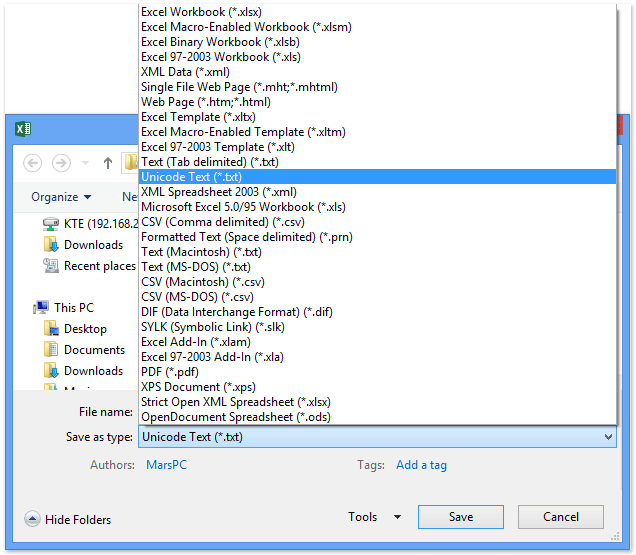

## How to avoid mojibake

The bad news is that English speakers can go for a long time without noticing mojibake.

The good news is that emoji are *everywhere*, people expect them to work, and they quickly reveal if you're doing Unicode right.

- Use lots of emoji! 👍💚🌠
- Use non-ASCII text, such as emoji, in your code, your UIs, your test cases
- This is similar to how Web frameworks used to pass around parameters like `&snowman=☃` and `&utf8=✔` to make sure browsers used UTF-8 and detect if they came out wrong

> **Side note**: Services such as Slack and Discord don't use Unicode for their emoji. They use ASCII strings like `:green-heart:` and turn them into images. These won't help you test anything. I recommend getting emoji for your test cases by copy-pasting them from emojipedia.org.


## Thanks!

- ftfy documentation: https://ftfy.readthedocs.org
- My e-mail address: rspeer@arborelia.net
- I'm @r_speer on Twitter
- I'll link from my Twitter to the notebook version of this talk
- BTW, I'm on the job market right now

Fonts I used for code in the presentation:

- Input: Fantasque Sans Mono
- Output: Fira Code